In [259]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
from pycoingecko import CoinGeckoAPI
from datetime import datetime
from defillama import DefiLlama


%matplotlib inline

In [260]:
# The Coingecko endpoint URLs for the held cryptocurrency assets
aave_url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&ids=aave"
compound_url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&ids=compound-governance-token"
cg = CoinGeckoAPI()

# initialize api client
llama = DefiLlama()

# Get all protocols data
response_llama = llama.get_all_protocols()
print(json.dumps(response_llama[0], indent=4, sort_keys=True))

{
    "address": "0xD533a949740bb3306d119CC777fa900bA034cd52",
    "audit_links": [
        "https://curve.fi/audits"
    ],
    "audit_note": null,
    "audits": "2",
    "category": "Dexes",
    "chain": "Multi-Chain",
    "chainTvls": {
        "Arbitrum": 246218881.86528054,
        "Avalanche": 1233510091.8710704,
        "Ethereum": 16027776565.34975,
        "Ethereum-staking": 1039198202.8222615,
        "Fantom": 670867388.9894818,
        "Harmony": 35670249.27369952,
        "Optimism": 331328.2535084315,
        "Polygon": 394001388.37652844,
        "staking": 1039198202.8222615,
        "xDai": 92520232.24411188
    },
    "chains": [
        "Ethereum",
        "Avalanche",
        "Fantom",
        "Polygon",
        "Arbitrum",
        "xDai",
        "Harmony",
        "Optimism"
    ],
    "change_1d": -0.5603622649018405,
    "change_1h": -0.0055241236032230745,
    "change_7d": -5.4361660330447705,
    "cmcId": "6538",
    "description": "Curve is a decentralized e

In [261]:


# Get a protocol data for uniswap
uniswap_response = llama.get_protocol(name='uniswap')

# Get all TVL from Ethereum network, not other networks
uniswap_response_df = pd.DataFrame(uniswap_response['chainTvls']['Ethereum']['tvl'], columns=['date','totalLiquidityUSD'])



uniswap_response_df['date'] = pd.to_datetime(uniswap_response_df['date'],unit='s')
uniswap_response_df.set_index('date',inplace=True)
uniswap_response_df.head()
# print(json.dumps(uniswap_response, indent=4, sort_keys=True))

,totalLiquidityUSD
date,
2018-11-03,34684.037747
2018-11-04,41292.993049
2018-11-05,41550.309965
2018-11-06,43233.560074
2018-11-07,153862.566498


In [262]:
uniswap_response_df.describe()

,totalLiquidityUSD
count,1.181000e+03
mean,2.638968e+09
std,3.367927e+09
min,3.468404e+04
25%,1.820555e+07
50%,7.820865e+07
75%,5.883141e+09
max,1.039974e+10


In [263]:

llama_df = pd.DataFrame(response_llama, columns=['name','symbol','chains','mcap','tvl'])
llama_df = llama_df.rename(columns={'mcap':'Market Cap','tvl':'Total Value Locked','chains':'Network'})

llama_df['MCAP/TVL'] = llama_df['Market Cap']/llama_df['Total Value Locked']

llama_df.head()
# print(json.dumps(response_llama, indent=4, sort_keys=True))

,name,symbol,Network,Market Cap,Total Value Locked,MCAP/TVL
0,Curve,CRV,"[Ethereum, Avalanche, Fantom, Polygon, Arbitru...",9.184529e+08,1.870090e+10,0.049113
1,MakerDAO,MKR,[Ethereum],1.590751e+09,1.567300e+10,0.101496
2,Convex Finance,CVX,[Ethereum],1.075484e+09,1.275140e+10,0.084342
3,AAVE,AAVE,"[Ethereum, Avalanche, Polygon]",1.814460e+09,1.166377e+10,0.155564
4,Polygon Bridge & Staking,MATIC,[Polygon],9.780815e+09,1.034399e+10,0.945555


In [277]:
# Get a protocol data
aave_response = llama.get_protocol(name='aave')

# Get a protocol data
compound_response = llama.get_protocol(name='compound')

# Get a protocol data
curve_response = llama.get_protocol(name='curve')

# Get a protocol data
uniswap_response = llama.get_protocol(name='uniswap')

# Get a protocol data
makerdao_response = llama.get_protocol(name='makerdao')

aave_defi_df = pd.DataFrame(
    aave_response['tvl'], 
    columns=['date', 
    'totalLiquidityUSD']).rename(columns={'totalLiquidityUSD':'AAVE TVL'}
                                                                        )

compound_defi_df = pd.DataFrame(
    compound_response['tvl'],
    columns=['date', 
    'totalLiquidityUSD']).rename(columns={'totalLiquidityUSD':'COMP TVL'}
                                )
curve_defi_df = pd.DataFrame(
    curve_response['tvl'], 
    columns=['date', 
    'totalLiquidityUSD']).rename(columns={'totalLiquidityUSD':'CURVE TVL'})

uniswap_defi_df = pd.DataFrame(uniswap_response['tvl'], 
    columns=['date', 
    'totalLiquidityUSD']).rename(columns={'totalLiquidityUSD':'UNISWAP TVL'})

makerdao_defi_df = pd.DataFrame(
    makerdao_response['tvl'], 
    columns=['date', 
    'totalLiquidityUSD']).rename(columns={'totalLiquidityUSD':'MAKER DAO TVL'})

aave_defi_df['date'] = pd.to_datetime(aave_defi_df['date'], unit='s')
compound_defi_df['date'] = pd.to_datetime(compound_defi_df['date'], unit='s')
curve_defi_df['date'] = pd.to_datetime(curve_defi_df['date'], unit='s')
uniswap_defi_df['date'] = pd.to_datetime(uniswap_defi_df['date'], unit='s')
makerdao_defi_df['date'] = pd.to_datetime(makerdao_defi_df['date'], unit='s')

#set the index column for each dataframe to 'date'
aave_defi_df.set_index('date',inplace=True)
compound_defi_df.set_index('date',inplace=True)
curve_defi_df.set_index('date',inplace=True)
uniswap_defi_df.set_index('date',inplace=True)
makerdao_defi_df.set_index('date',inplace=True)

# combine_defi_df = [aave_defi_df, compound_defi_df, curve_defi_df, uniswap_defi_df, 
#wbtc_defi_df, makerdao_defi_df]

tvl_df = pd.concat([aave_defi_df, 
                    compound_defi_df, 
                    curve_defi_df, 
                    uniswap_defi_df, 
                    makerdao_defi_df]).groupby(['date']).sum()
#tvl_df.fillna(method= 'pad')
tvl_df=tvl_df.mask(tvl_df==0).ffill(downcast='infer').fillna(0)

tvl_df.info()
display(tvl_df.head(100))
display(tvl_df.tail(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2146 entries, 2018-11-03 00:00:00 to 2022-02-22 19:01:52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AAVE TVL       2146 non-null   float64
 1   COMP TVL       2146 non-null   float64
 2   CURVE TVL      2146 non-null   float64
 3   UNISWAP TVL    2146 non-null   float64
 4   MAKER DAO TVL  2146 non-null   float64
dtypes: float64(5)
memory usage: 100.6 KB


,AAVE TVL,COMP TVL,CURVE TVL,UNISWAP TVL,MAKER DAO TVL
date,,,,,
2018-11-03,0.0,0.0,0.0,3.468404e+04,0.000000e+00
2018-11-04,0.0,0.0,0.0,4.129299e+04,0.000000e+00
2018-11-05,0.0,0.0,0.0,4.155031e+04,0.000000e+00
2018-11-06,0.0,0.0,0.0,4.323356e+04,0.000000e+00
2018-11-07,0.0,0.0,0.0,1.538626e+05,0.000000e+00
...,...,...,...,...,...
2019-02-06,0.0,0.0,0.0,7.902150e+05,2.185224e+08
2019-02-07,0.0,0.0,0.0,8.485165e+05,2.109902e+08
2019-02-08,0.0,0.0,0.0,9.922616e+05,2.161253e+08


,AAVE TVL,COMP TVL,CURVE TVL,UNISWAP TVL,MAKER DAO TVL
date,,,,,
2022-02-14 00:00:00,1.330466e+10,6.983897e+09,1.954831e+10,7.245382e+09,1.684003e+10
2022-02-15 00:00:00,1.326397e+10,7.054297e+09,1.943360e+10,7.358130e+09,1.696476e+10
2022-02-16 00:00:00,1.377203e+10,7.543162e+09,1.987663e+10,7.783955e+09,1.790344e+10
2022-02-17 00:00:00,1.357224e+10,7.504268e+09,1.986333e+10,7.836969e+09,1.768059e+10
2022-02-18 00:00:00,1.274358e+10,6.898350e+09,1.948774e+10,7.836969e+09,1.665379e+10
2022-02-18 10:02:37,1.274358e+10,6.898350e+09,1.948774e+10,7.525129e+09,1.665379e+10
2022-02-19 00:00:00,1.247254e+10,6.754811e+09,1.927637e+10,7.525129e+09,1.634400e+10
2022-02-20 00:00:00,1.242510e+10,6.713230e+09,1.924455e+10,7.525129e+09,1.638663e+10
2022-02-21 00:00:00,1.203861e+10,6.601931e+09,1.890430e+10,7.525129e+09,1.594744e+10


In [280]:
# Navigate the AAVE response object to access the current price of AAVE
aave_price = aave_response['current_price']

# Print the current price of AAVE
print(f'The current price of AAVE is ${aave_price}.')
aave_df = pd.DataFrame(aave_response, columns=['ath_date','current_price','market_cap','max_supply','total_volume'])
aave_df.set_index('ath_date',inplace=True)
aave_df

TypeError: 'dict' object is not callable

In [15]:

# Get AAVE price directly from CoinGecko using CoinGeckoAPI()
# Note that the price is different from getting the price using response object
aave_price_cg = cg.get_price(ids='aave', vs_currencies='usd')
aave_price_cg = aave_price_cg['aave']['usd']
print(f'The current price of AAVE is ${aave_price_cg}.')


The current price of AAVE is $129.41.


In [18]:
# Get COMP price directly from CoinGecko using CoinGeckoAPI()
# Note that the price is different from getting the price using response object
compound_price_cg = cg.get_price(ids='compound-governance-token', vs_currencies='usd')
compound_price_cg = compound_price_cg['compound-governance-token']['usd']

print(f'The current price of COMP is ${compound_price_cg}.')

The current price of COMP is $106.22.


In [19]:
# Set the tickers for both the bond and stock portion of the portfolio
# ids = {'aave'}

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day

start_date = pd.Timestamp("2018-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [20]:
# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [21]:
# Use CoinGecko API to pull data for aave
aave_prices = cg.get_coins_markets(
    vs_currency='usd',

)

aave_df = pd.DataFrame(aave_prices, columns =['id', 'current_price',  'market_cap'])
aave_df.set_index('id', inplace=True)

# Display both the first and last five rows of the DataFrame
aave_df.head()


,current_price,market_cap
id,,
bitcoin,37180.000,703722951867
ethereum,2580.210,308357369012
tether,1.001,79529285753
binancecoin,358.810,60038965385
usd-coin,1.004,52743788177


In [22]:
exchanges_list = cg.get_exchanges_list()

exchanges_list_df = pd.DataFrame(exchanges_list, columns= [ 'id','name','trust_score','trust_score_rank'])
exchanges_list_df.set_index('id',inplace=True)

exchanges_list_df

,name,trust_score,trust_score_rank
id,,,
binance,Binance,10,1
okex,OKX,10,2
gdax,Coinbase Exchange,10,3
ftx_spot,FTX,10,4
crypto_com,Crypto.com Exchange,10,5
...,...,...,...
bitvavo,Bitvavo,6,96
quoine,Liquid,6,97
sushiswap,Sushiswap,6,98


In [23]:
exchanges_list_df.head(50)

,name,trust_score,trust_score_rank
id,,,
binance,Binance,10,1
okex,OKX,10,2
gdax,Coinbase Exchange,10,3
ftx_spot,FTX,10,4
crypto_com,Crypto.com Exchange,10,5
kucoin,KuCoin,10,6
huobi,Huobi Global,10,7
gate,Gate.io,10,8
bitfinex,Bitfinex,10,9


In [374]:
# Get AAVE historical market cap directly from CoinGecko using CoinGeckoAPI()

aave_market_cap_cg = cg.get_coin_market_chart_by_id(id='aave', vs_currency='usd', days='1500')


# Get COMPOUND historical market cap directly from CoinGecko using CoinGeckoAPI()

comp_market_cap_cg = cg.get_coin_market_chart_by_id(id='compound-governance-token', vs_currency='usd', days='1500')


# Get Curve historical market cap directly from CoinGecko using CoinGeckoAPI()

curve_market_cap_cg = cg.get_coin_market_chart_by_id(id='curve-dao-token', vs_currency='usd', days='1500')


# Get Uniswap historical market cap directly from CoinGecko using CoinGeckoAPI()

uni_market_cap_cg = cg.get_coin_market_chart_by_id(id='uniswap', vs_currency='usd', days='1500')


# Get Maker Dao historical market cap directly from CoinGecko using CoinGeckoAPI()

maker_market_cap_cg = cg.get_coin_market_chart_by_id(id='maker', vs_currency='usd', days='1500')

#create a dataframe for each coin's market cap and set format the date from unix to datetime:
aave_market_cap_cg_df= pd.DataFrame(aave_market_cap_cg['market_caps'])
aave_market_cap_cg_df[0]= pd.to_datetime(aave_market_cap_cg_df[0], unit='ms')
aave_market_cap_cg_df.columns=['date', 'aave mcap']
aave_market_cap_cg_df.set_index('date',inplace=True)

comp_market_cap_cg_df= pd.DataFrame(comp_market_cap_cg['market_caps'])
comp_market_cap_cg_df[0]= pd.to_datetime(comp_market_cap_cg_df[0], unit='ms')
comp_market_cap_cg_df.columns=['date', 'comp mcap']
comp_market_cap_cg_df.set_index('date',inplace=True)

curve_market_cap_cg_df= pd.DataFrame(curve_market_cap_cg['market_caps'])
curve_market_cap_cg_df[0]= pd.to_datetime(curve_market_cap_cg_df[0], unit='ms')
curve_market_cap_cg_df.columns=['date', 'curve mcap']
curve_market_cap_cg_df.set_index('date',inplace=True)

uni_market_cap_cg_df= pd.DataFrame(uni_market_cap_cg['market_caps'])
uni_market_cap_cg_df[0]= pd.to_datetime(uni_market_cap_cg_df[0], unit='ms')
uni_market_cap_cg_df.columns=['date', 'uni mcap']
uni_market_cap_cg_df.set_index('date',inplace=True)

maker_market_cap_cg_df= pd.DataFrame(maker_market_cap_cg['market_caps'])
maker_market_cap_cg_df[0]= pd.to_datetime(maker_market_cap_cg_df[0], unit='ms')
maker_market_cap_cg_df.columns=['date', 'maker mcap']
maker_market_cap_cg_df.set_index('date',inplace=True)

#Combine the dataframes using pd.concat:

all_coins_mcap_df = pd.concat(
    [aave_market_cap_cg_df,
     comp_market_cap_cg_df, 
     curve_market_cap_cg_df, 
     uni_market_cap_cg_df,  
     maker_market_cap_cg_df], 
    axis=1 
)

all_coins_mcap_df.groupby(['date']).sum().drop_duplicates()
all_coins_mcap_df = all_coins_mcap_df.mask(all_coins_mcap_df==0).ffill(downcast='infer').fillna(0)

all_coins_mcap_df.head(100)


,aave mcap,comp mcap,curve mcap,uni mcap,maker mcap
date,,,,,
2018-01-15,0.0,0.0,0.0,0.0,0.000000e+00
2018-01-16,0.0,0.0,0.0,0.0,0.000000e+00
2018-01-17,0.0,0.0,0.0,0.0,6.851221e+08
2018-01-18,0.0,0.0,0.0,0.0,9.644283e+08
2018-01-19,0.0,0.0,0.0,0.0,9.647005e+08
...,...,...,...,...,...
2018-04-20,0.0,0.0,0.0,0.0,5.212041e+08
2018-04-21,0.0,0.0,0.0,0.0,5.461631e+08
2018-04-22,0.0,0.0,0.0,0.0,5.627881e+08


In [375]:
combined_mcap_tvl_df = pd.concat([
    all_coins_mcap_df, tvl_df], axis=1).groupby(['date']).sum()
combined_mcap_tvl_df = combined_mcap_tvl_df.mask(combined_mcap_tvl_df==0).ffill(downcast='infer').fillna(0)

combined_mcap_tvl_df.tail()

,aave mcap,comp mcap,curve mcap,uni mcap,maker mcap,AAVE TVL,COMP TVL,CURVE TVL,UNISWAP TVL,MAKER DAO TVL
date,,,,,,,,,,
2022-02-22 20:56:39,1.804805e+09,7.018940e+08,9.242833e+08,3.920301e+09,1.515760e+09,1.166377e+10,6.461639e+09,1.870090e+10,7.525129e+09,1.567300e+10
2022-02-22 20:56:41,1.804805e+09,7.018940e+08,9.242833e+08,3.992311e+09,1.515760e+09,1.166377e+10,6.461639e+09,1.870090e+10,7.525129e+09,1.567300e+10
2022-02-22 20:57:19,1.804805e+09,7.018940e+08,9.242833e+08,3.992311e+09,1.593198e+09,1.166377e+10,6.461639e+09,1.870090e+10,7.525129e+09,1.567300e+10
2022-02-22 20:57:41,1.804805e+09,7.304203e+08,9.242833e+08,3.992311e+09,1.593198e+09,1.166377e+10,6.461639e+09,1.870090e+10,7.525129e+09,1.567300e+10
2022-02-22 20:57:42,1.804805e+09,7.304203e+08,9.261330e+08,3.992311e+09,1.593198e+09,1.166377e+10,6.461639e+09,1.870090e+10,7.525129e+09,1.567300e+10


In [395]:
aave_mcap_tvl_ratio_df = pd.DataFrame(combined_mcap_tvl_df['aave mcap']/combined_mcap_tvl_df['AAVE TVL'])

comp_mcap_tvl_ratio_df = pd.DataFrame(combined_mcap_tvl_df['comp mcap']/combined_mcap_tvl_df['COMP TVL'])

curve_mcap_tvl_ratio_df = pd.DataFrame(combined_mcap_tvl_df['curve mcap']/combined_mcap_tvl_df['CURVE TVL'])

uni_mcap_tvl_ratio_df = pd.DataFrame(combined_mcap_tvl_df['uni mcap']/combined_mcap_tvl_df['UNISWAP TVL'])

maker_mcap_tvl_ratio_df = pd.DataFrame(combined_mcap_tvl_df['maker mcap']/combined_mcap_tvl_df['MAKER DAO TVL'])


<AxesSubplot:title={'center':'MARKET CAP/TVL RATIOS-- ALL DApps'}, xlabel='date'>

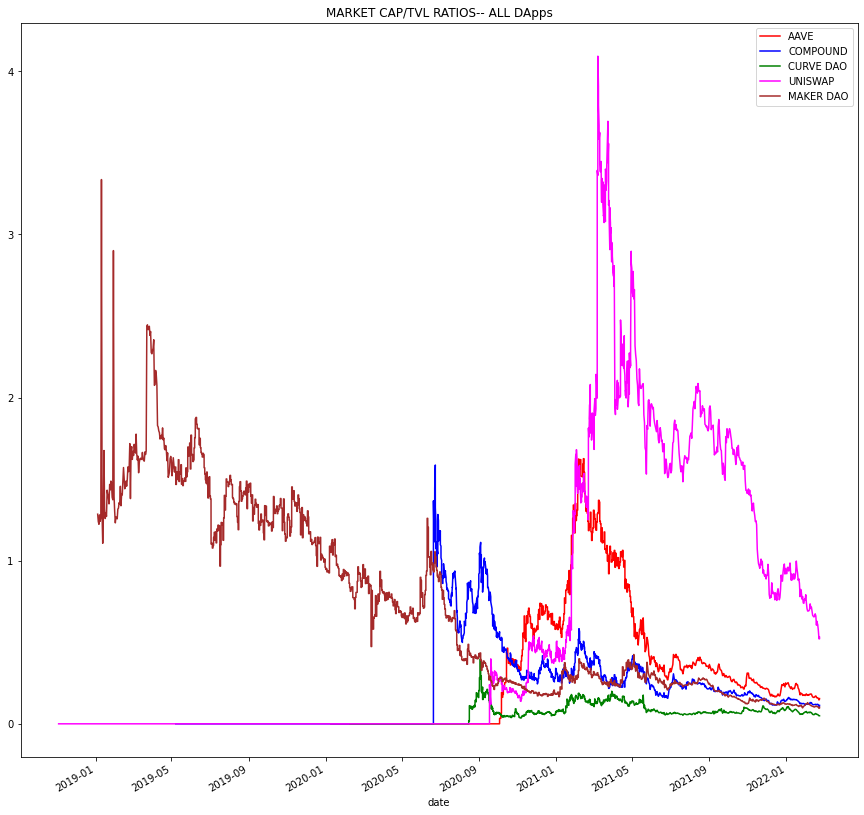

In [411]:
aave_mcap_tvl_ratio_df[0].plot(legend=True, figsize=[15,15], title='MARKET CAP/TVL RATIOS-- ALL DApps', color='red', label='AAVE')
comp_mcap_tvl_ratio_df[0].plot(legend=True, figsize=[15,15], color='blue', label='COMPOUND')
curve_mcap_tvl_ratio_df[0].plot(legend=True, figsize=[15,15], color='green', label='CURVE DAO')
uni_mcap_tvl_ratio_df[0].plot(legend=True, figsize=[15,15], color='magenta', label='UNISWAP')
maker_mcap_tvl_ratio_df[0].plot(legend=True, figsize=[15,15], color='brown', label='MAKER DAO')

<AxesSubplot:title={'center':'MARKET CAPITALIZATION-- ALL DApps'}, xlabel='date'>

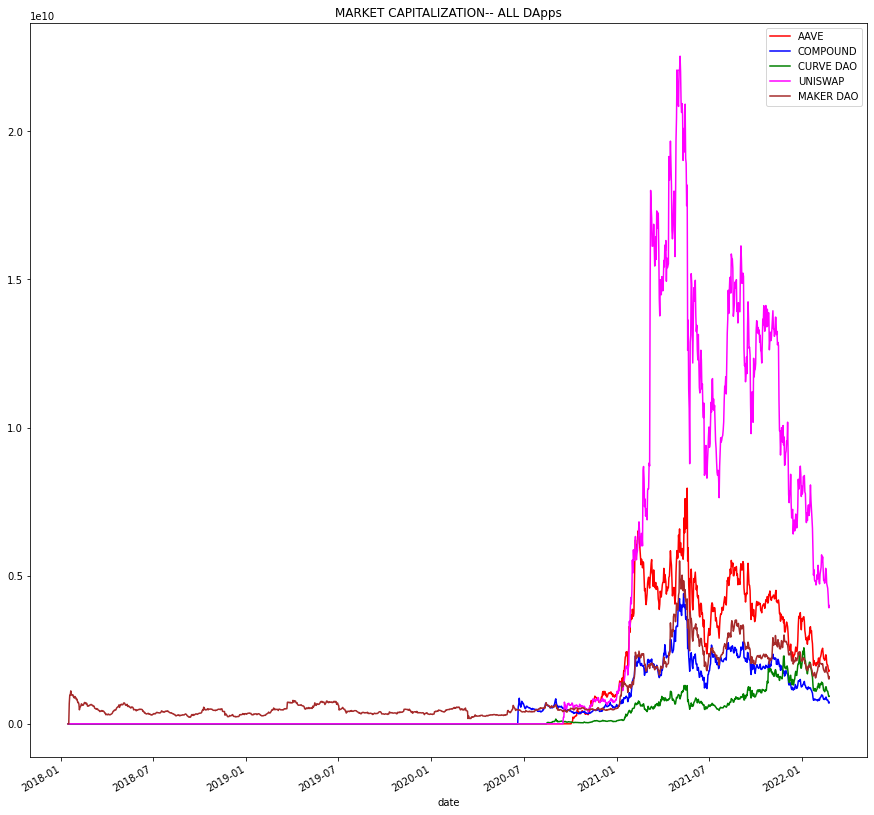

In [421]:
all_coins_mcap_df['aave mcap'].plot(legend=True, figsize=[15,15], title='MARKET CAPITALIZATION-- ALL DApps', color='red', label='AAVE')
all_coins_mcap_df['comp mcap'].plot(legend=True, figsize=[15,15], color='blue', label='COMPOUND')
all_coins_mcap_df['curve mcap'].plot(legend=True, figsize=[15,15], color='green', label='CURVE DAO')
all_coins_mcap_df['uni mcap'].plot(legend=True, figsize=[15,15], color='magenta', label='UNISWAP')
all_coins_mcap_df['maker mcap'].plot(legend=True, figsize=[15,15], color='brown', label='MAKER DAO')